           model  precision    recall  f1-score  accuracy
0  random_forest   0.999148  0.999148  0.999148  0.999148
1        xgboost   0.998722  0.998722  0.998722  0.998722
Saved Accuracy comparison plot: ../reports/accuracy_comparison.png


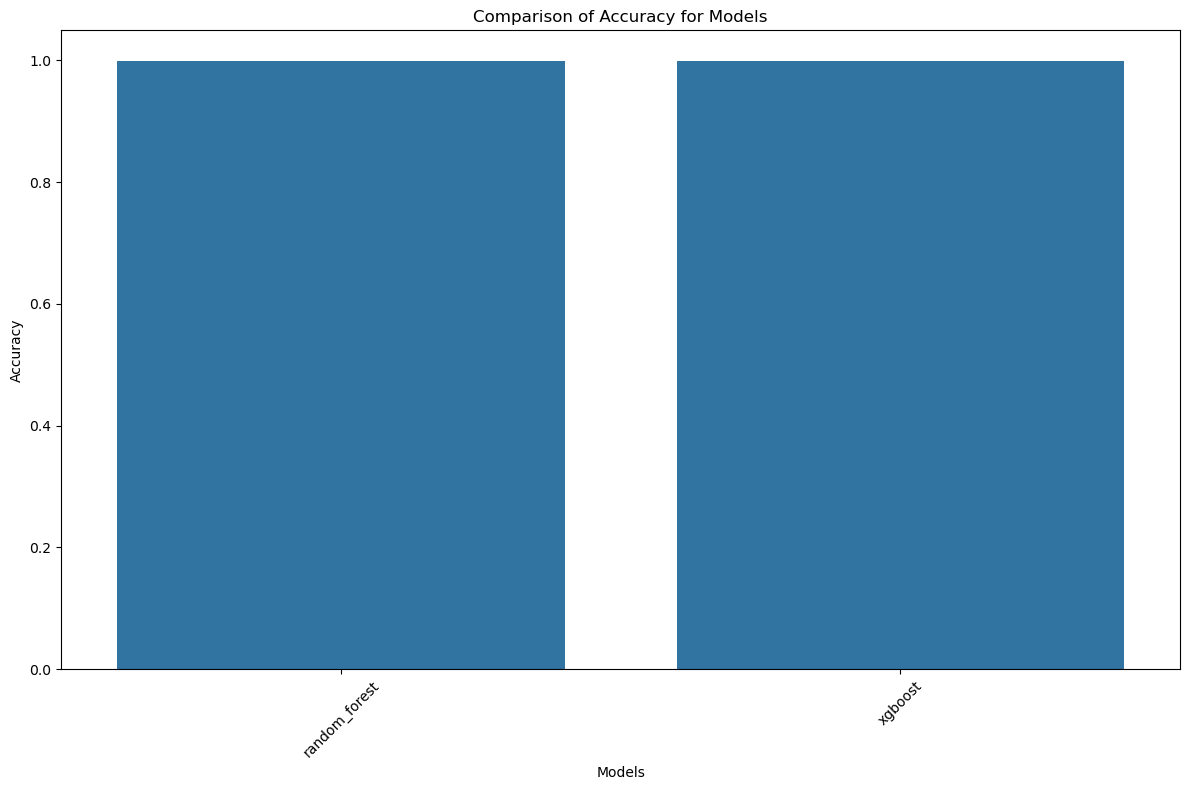

Saved Precision comparison plot: ../reports/precision_comparison.png


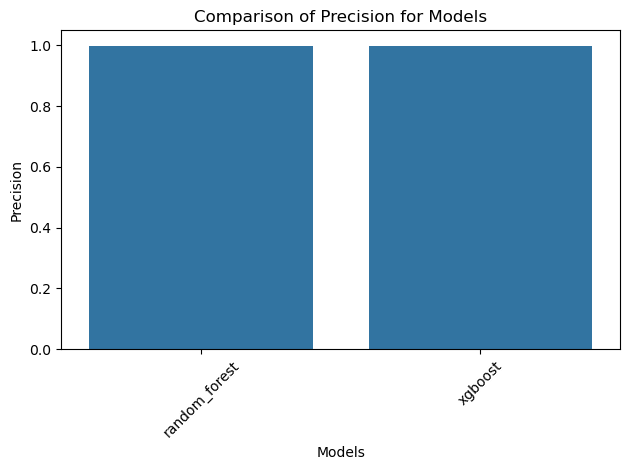

Saved Recall comparison plot: ../reports/recall_comparison.png


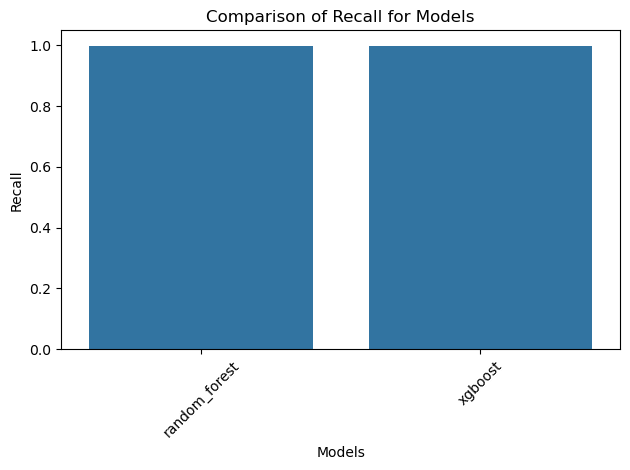

Saved F1-score comparison plot: ../reports/f1-score_comparison.png


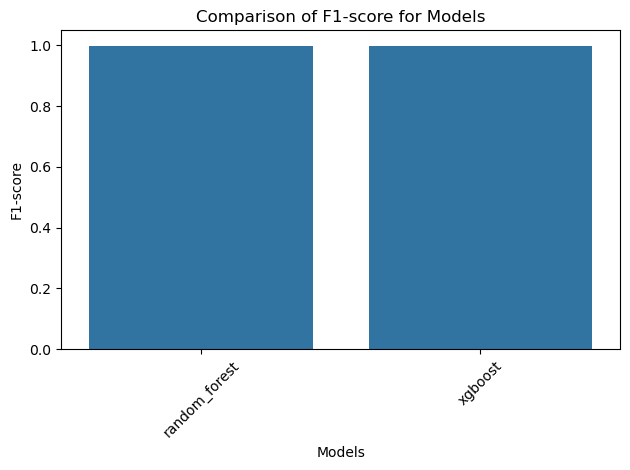

In [6]:
import pandas as pd
import ast  # To safely evaluate dictionary-like strings
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV
evaluation_summary_path = '../reports/model_evaluation_summary.csv'
evaluation_summary = pd.read_csv(evaluation_summary_path, index_col=0)

# Initialize a list to collect metrics for the new DataFrame
metrics_list = []

# Extract metrics for each model
for model_name, row in evaluation_summary.iterrows():
    # Extract accuracy
    accuracy = row['accuracy']
    
    # Extract metrics from the first two columns (e.g., '0' and '1')
    metrics_0 = ast.literal_eval(row['0'])
    metrics_1 = ast.literal_eval(row['1'])
    
    # Compute macro-average precision, recall, and f1-score
    precision = (metrics_0['precision'] + metrics_1['precision']) / 2
    recall = (metrics_0['recall'] + metrics_1['recall']) / 2
    f1_score = (metrics_0['f1-score'] + metrics_1['f1-score']) / 2
    
    # Add metrics to the list
    metrics_list.append({
        'model': model_name,
        'precision': precision,
        'recall': recall,
        'f1-score': f1_score,
        'accuracy': accuracy
    })

# Convert the list of metrics to a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Print the processed metrics DataFrame
print(metrics_df)

# Plot the metrics for comparison
metrics_to_compare = ['accuracy', 'precision', 'recall', 'f1-score']
plt.figure(figsize=(12, 8))
for metric in metrics_to_compare:
    sns.barplot(data=metrics_df, x='model', y=metric)
    plt.title(f"Comparison of {metric.capitalize()} for Models")
    plt.ylabel(metric.capitalize())
    plt.xlabel('Models')
    plt.xticks(rotation=45)
    plt.tight_layout()
    # Save the plot
    plot_path = f'../reports/{metric}_comparison.png'
    plt.savefig(plot_path)
    print(f"Saved {metric.capitalize()} comparison plot: {plot_path}")
    plt.show()
